In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from taxi_pakage import *

In [2]:
taxi = pd.read_csv('edited_taxi.csv')
feature_n, features = get_features(taxi)

In [4]:
test = dmatrix("{}".format(features), taxi, return_type ="dataframe" )
test.tail()

,Intercept,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,holiday,holiday_Fri,weekday,trip_duration
1458639,1.0,2376096.0,2.0,4.0,-73.982201,40.745522,-73.994911,40.740170,0.0,1.224311,98.0,48663.0,49441.0,0.0,1.0,4.0,778.0
1458640,1.0,1049543.0,1.0,1.0,-74.000946,40.747379,-73.970184,40.796547,0.0,6.046037,9.0,27314.0,27969.0,1.0,1.0,6.0,655.0
1458641,1.0,2304944.0,2.0,1.0,-73.959129,40.768799,-74.004433,40.707371,0.0,7.819693,112.0,25060.0,25824.0,0.0,1.0,4.0,764.0
1458642,1.0,2714485.0,1.0,1.0,-73.982079,40.749062,-73.974632,40.757107,0.0,1.091878,4.0,57385.0,57758.0,0.0,0.0,1.0,373.0
1458643,1.0,1209952.0,1.0,1.0,-73.979538,40.781750,-73.972809,40.790585,0.0,1.133330,95.0,53064.0,53262.0,0.0,0.0,1.0,198.0


In [5]:
feature_n, features=get_features(test, 1, -1)
feature_n, features

(15,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + dist + pick_date + pick_time + drop_time + holiday + holiday_Fri + weekday')

In [6]:
model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     951.8
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:04:28   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458628   BIC:                         2.911e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.029e+05   8493.174     12.121      0.000    8.63e+04     1.2e+05
id                  -8.17e-06   3.74e-06     -2.186      0.029   -1.55e-05   -8.45e-07
vendor_id            199.7325      9.061     22.042      0.000     181.972     217.493
passenger_count        8.4738      3.430      2.470      0.013       1.751      15.197
pickup_longitude     -24.7572    101.890     -0.243      0.808    -224.458     174.943
pickup_latitude    -1387.7927    154.266     -8.996      0.000   -1690.148   -1085.437
dropoff_longitude    315.2532    100.092      3.150      0.002     119.077     511.430
dropoff_latitude    -607.7434    139.445     -4.358      0.000    -881.051    -334.436
store_and_fwd_flag    47.6592     58.481      0.815      0.415     -66.962     162.280
dist                 112.1010      1.076    104.211      0.000     109.993     114.209
pick_date              0.4799      0.084      5.718      0.000       0.315       0.644
pick_time             -0.0047      0.001     -9.078      0.000      -0.006      -0.004
drop_time              0.0061      0.001     11.968      0.000       0.005       0.007
holiday             -111.8358     14.647     -7.635      0.000    -140.544     -83.127
holiday_Fri          -25.1899     16.105     -1.564      0.118     -56.756       6.376
weekday               21.5922      4.047      5.335      0.000      13.660      29.525
================================================================================
Omnibus:                  8314824.047   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2325036240968843.500
Skew:                         347.762   Prob(JB):                           0.00
Kurtosis:                  195591.395   Cond. No.                       4.55e+09
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- id 값이 2.9%의 유의확률을 보인다.    
    - a unique identifier for each trip
    - 의미 없는 수치가 아닐까?
    - -> 제거


- 좌표값 4개중 - 개만 유의확률이 확연하게 높다. 
    - 한개를 빼려면 나머지도 다 빼는게 나은가? 
    - 좌표값 4개의 정보는 dist에 포함되어 있으니 제거하는게 마땅한가?
    - -> 제거


- store_and_fwd_flag 
    - 4- % 유의확률- > 제거


- 휴일에 금요일을 포함하면 유의확률이 11 %로 증가한다. 
    - 금요일이 포함되지 않은 feature로 선택한다.

In [7]:
test = test.drop(["id", "dropoff_longitude", "dropoff_latitude", "pickup_longitude", "pickup_latitude","store_and_fwd_flag", "holiday_Fri"], axis = 1)
test.tail()

,Intercept,vendor_id,passenger_count,dist,pick_date,pick_time,drop_time,holiday,weekday,trip_duration
1458639,1.0,2.0,4.0,1.224311,98.0,48663.0,49441.0,0.0,4.0,778.0
1458640,1.0,1.0,1.0,6.046037,9.0,27314.0,27969.0,1.0,6.0,655.0
1458641,1.0,2.0,1.0,7.819693,112.0,25060.0,25824.0,0.0,4.0,764.0
1458642,1.0,1.0,1.0,1.091878,4.0,57385.0,57758.0,0.0,1.0,373.0
1458643,1.0,1.0,1.0,1.133330,95.0,53064.0,53262.0,0.0,1.0,198.0


---

### vendor_id, weekday, holiday는 카테고리 변수로 취급
나머지는 스케일링해서 입력

In [8]:
feature_n, features = get_features(test, 2, -3, scale=True)
feature_n, features

(5,
 'scale(passenger_count) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(drop_time)')

In [9]:
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1089.
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:06:49   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458630   BIC:                         2.911e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(vendor_id)[1.0]        783.0869     13.350     58.658      0.000     756.921     809.252
C(vendor_id)[2.0]        981.6864     13.125     74.793      0.000     955.961    1007.412
C(weekday)[T.1.0]        100.6162     16.987      5.923      0.000      67.322     133.910
C(weekday)[T.2.0]         94.0116     16.847      5.580      0.000      60.992     127.031
C(weekday)[T.3.0]        117.3451     16.697      7.028      0.000      84.619     150.071
C(weekday)[T.4.0]        115.9543     16.366      7.085      0.000      83.877     148.031
C(weekday)[T.5.0]        156.3448     30.605      5.108      0.000      96.360     216.330
C(weekday)[T.6.0]         65.4834     30.873      2.121      0.034       4.973     125.994
C(holiday)[T.1.0]        -81.0950     28.969     -2.799      0.005    -137.874     -24.316
scale(passenger_count)    11.1765      4.508      2.479      0.013       2.341      20.012
scale(dist)              497.5622      4.320    115.188      0.000     489.096     506.028
scale(pick_date)          25.5353      4.362      5.855      0.000      16.987      34.084
scale(pick_time)        -109.0019     11.924     -9.141      0.000    -132.373     -85.630
scale(drop_time)         141.3469     11.925     11.853      0.000     117.975     164.719
================================================================================
Omnibus:                  8314567.341   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2324432585905564.000
Skew:                         347.722   Prob(JB):                           0.00
Kurtosis:                  195566.003   Cond. No.                           16.0
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
A, Dropped = erase_outlier_np(result, test, feature_n, dropped=True)
len(A), len(Dropped)

(1456449, 2195)

In [14]:
len(test)

1458644

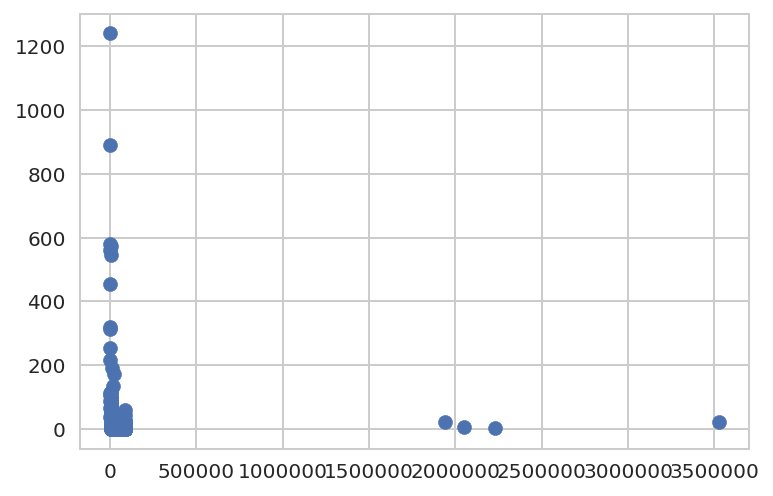

In [15]:
plt.scatter(Dropped['trip_duration'], Dropped['dist'])

### 아웃라이어를 제거한 자료로만 분석

In [16]:
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=A)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.710e+05
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        11:14:31   Log-Likelihood:            -1.0843e+07
No. Observations:             1456449   AIC:                         2.169e+07
Df Residuals:                 1456435   BIC:                         2.169e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(vendor_id)[1.0]        801.0135      1.061    754.971      0.000     798.934     803.093
C(vendor_id)[2.0]        800.1009      1.043    766.844      0.000     798.056     802.146
C(weekday)[T.1.0]         63.1018      1.350     46.733      0.000      60.455      65.748
C(weekday)[T.2.0]         88.4778      1.339     66.074      0.000      85.853      91.102
C(weekday)[T.3.0]         96.0939      1.327     72.403      0.000      93.493      98.695
C(weekday)[T.4.0]         80.5494      1.301     61.917      0.000      78.000      83.099
C(weekday)[T.5.0]         81.0602      2.433     33.317      0.000      76.292      85.829
C(weekday)[T.6.0]         16.7834      2.454      6.839      0.000      11.973      21.594
C(holiday)[T.1.0]        -86.0069      2.303    -37.347      0.000     -90.521     -81.493
scale(passenger_count)     5.4756      0.358     15.278      0.000       4.773       6.178
scale(dist)              507.5378      0.343   1477.769      0.000     506.865     508.211
scale(pick_date)          28.5714      0.347     82.403      0.000      27.892      29.251
scale(pick_time)         -40.1528      0.951    -42.244      0.000     -42.016     -38.290
scale(drop_time)          68.1998      0.951     71.747      0.000      66.337      70.063
==============================================================================
Omnibus:                   765134.668   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20421869.975
Skew:                           1.996   Prob(JB):                         0.00
Kurtosis:                      20.905   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

모든 feature들의 유의 확률이 0이 되었다.
- 카테고리가 저렇게 많아도 되나?

---

In [ ]:
sample = test.loc[0:300000,:]
sample_train = sample.loc[0:270000]
sample_test = sample.loc[270001:]
len(sample_train), len(sample_test), len(sample)